In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("./CO2 Emissions_Canada.csv")
df.head(2)

,ID,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
0,1,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,196
1,2,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,221


In [4]:
df.shape

(7385, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                7385 non-null   int64  
 1   Make                              7385 non-null   object 
 2   Model                             7385 non-null   object 
 3   Vehicle Class                     7385 non-null   object 
 4   Engine Size(L)                    7385 non-null   float64
 5   Cylinders                         7385 non-null   int64  
 6   Transmission                      7385 non-null   object 
 7   Fuel Type                         7385 non-null   object 
 8   Fuel Consumption City (L/100 km)  7385 non-null   float64
 9   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 10  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 634.8+ KB


In [6]:
df.describe()

,ID,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3693.000000,3.160068,5.615030,12.556534,9.041706,250.584699
std,2132.010202,1.354170,1.828307,3.500274,2.224456,58.512679
min,1.000000,0.900000,3.000000,4.200000,4.000000,96.000000
25%,1847.000000,2.000000,4.000000,10.100000,7.500000,208.000000
50%,3693.000000,3.000000,6.000000,12.100000,8.700000,246.000000
75%,5539.000000,3.700000,6.000000,14.600000,10.200000,288.000000
max,7385.000000,8.400000,16.000000,30.600000,20.600000,522.000000


In [7]:
df.isna().sum()

ID                                  0
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(7385, 11)

In [12]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)'], dtype=object)

In [13]:
le = LabelEncoder()

In [14]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

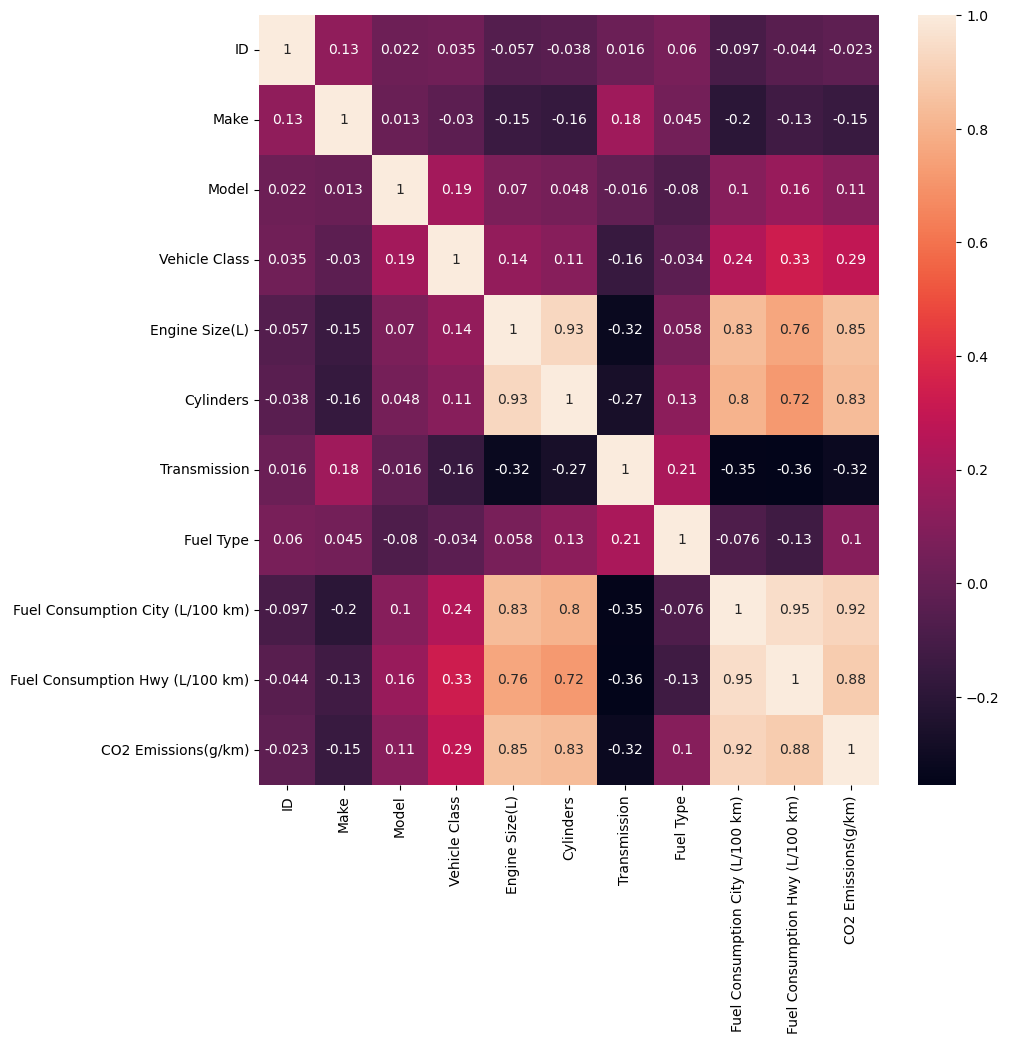

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
df.head(2)

,ID,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
0,1,0,1057,0,2.0,4,14,4,9.9,6.7,196
1,2,0,1057,0,2.4,4,25,4,11.2,7.7,221


In [17]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [18]:
y.value_counts()

CO2 Emissions(g/km)
242    85
221    82
230    77
214    77
294    76
       ..
154     1
103     1
428     1
372     1
385     1
Name: count, Length: 331, dtype: int64

In [19]:
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [22]:
X_test

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km)
6307,32,196,3,-0.123655,0.209958,26,4,-0.159753,-0.391154
5036,23,1483,11,-0.863084,-0.887771,17,0,-0.977726,-0.575161
1995,32,183,3,0.467888,0.209958,9,4,-0.013687,-0.023141
4156,31,279,2,-0.493370,-0.887771,22,3,-1.094579,-1.173182
6328,32,195,3,-0.123655,0.209958,9,4,-0.451886,-0.253149
...,...,...,...,...,...,...,...,...,...
1632,18,1435,2,1.798859,1.307687,16,4,0.716646,0.528879
4640,10,51,1,0.320002,0.209958,5,1,1.476191,1.356908
4021,27,612,11,-0.493370,-0.887771,15,3,-0.305820,-0.069143
660,24,785,2,-0.493370,-0.887771,21,3,-1.970978,-1.311187


In [23]:
# Create a Linear Regression model and fit it
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [24]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([134.4256843 ,  64.96740296, 150.72582188, ..., 121.26135775,
        52.73772378, 113.42171437])

In [25]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

0.8905430078832607

In [26]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

99.40300832711753

In [27]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

99.52655894762796